In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['axes.grid'] = True
import os
import sys

In [2]:
#Method creates a dataframe containing labels of all quarters

def create_label_df(label_df,path):
    for id in range(1,8):
        df=pd.read_csv(path+"/"+str(id)+"_qt_result.csv")
        df.drop(columns=["Unnamed: 0"],inplace=True)
        label_df=pd.merge(label_df,df[['symbol','sector','label']],on=['symbol','sector'],\
                          how='outer',suffixes=(str(id), str(id+1)))        
        label_df=label_df.dropna()
    return(label_df)    
        

In [3]:
def cluster_change(label_df,qtr_len,num_clstr,cols,senti_label):
       
    change_lst=[]
    for i in range(1,qtr_len):   
        change=label_df.shape[0]-label_df[label_df.duplicated(subset=[cols[i-1],cols[i]],keep=False)].shape[0]
        #print(change)    
        change_lst.append(change)

    change_df=pd.DataFrame(change_lst,columns=['change'])
    change_df.index=['Qtr_1-2','Qtr_2-3','Qtr_3-4','Qtr_4-5','Qtr_5-6','Qtr_6-7','Qtr_7-8']
    change_df.plot(kind='bar')
    plt.xlabel('consecutive cluster change')
    plt.ylabel('Number of companies')
    plt.title("No. of companies that could not retain cluster membership with any company with change in quarters.")
    if(senti_label):
        filename="change_in_membership_withsenti_cl"+str(num_clstr)
    else:
        filename="change_in_membership_withoutsenti_cl"+str(num_clstr)
        
    plt.savefig(filename)   

In [4]:
def cluster_comb(label_df,col):
    
    cluster_movement_df=label_df[label_df.duplicated(subset=col,keep=False)].drop_duplicates(col)[col].reset_index(drop=True)
    print(" \nTotal number of unique combinations for cluster movements in the data for all quarters=\n", cluster_movement_df.shape[0])
    print(cluster_movement_df.head(5))

In [5]:
def cluster_member(label_df,col,num_clstr,senti_label):
    new_df=label_df[label_df.duplicated(subset=col,keep=False)].groupby(list(col)).agg({'symbol': ','.join,'sector':','.join}).reset_index()[['symbol','sector']]
    print("\nList of set of companies that were always together in a cluster for all quarters")
    if(senti_label):
        filename="companies_clstr_membership_withsenti_cl"+str(num_clstr)+".csv"
    else:
        filename="companies_clstr_membership_withoutsenti_cl"+str(num_clstr)+".csv"
    new_df.to_csv(filename)
    print(new_df)

## EDA-with 3 Clusters(with sentiment)

 
Total number of unique combinations for cluster movements in the data for all quarters=
 23
   label1  label2  label3  label4  label5  label6  label7  label8
0       2       2       2       1     2.0       1     0.0     1.0
1       0       0       2       1     2.0       0     2.0     1.0
2       0       0       2       1     2.0       0     2.0     0.0
3       1       1       0       1     0.0       0     2.0     1.0
4       2       2       0       0     1.0       1     2.0     1.0

List of set of companies that were always together in a cluster for all quarters
             symbol                                         sector
0           AJG,IFF                           Financials,Materials
1          CMCSA,CL        Consumer Discretionary,Consumer Staples
2           CAT,PPG                          Industrials,Materials
3           AAL,CAH                        Industrials,Health Care
4           CSX,ADP             Industrials,Information Technology
5       DISCA,DISCK  Consu

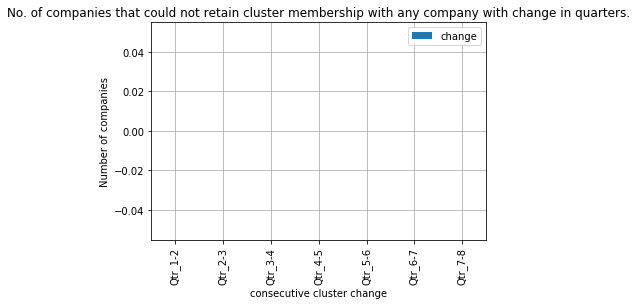

In [6]:
#create label dataframe for cluster 3 results"
label_df_cl3=pd.DataFrame()
current_dir=os.getcwd()
path=os.path.join(current_dir, 'Results_with_sentiment/cluster_df_cl3')

df=pd.read_csv(path+"/1_qt_result.csv")
df=df.drop(columns=['Unnamed: 0'])
label_df_cl3=df[['symbol','sector','label']]
#label_df_cl3.rename(columns = {'label':'label_1'}, inplace = True)
temp=label_df_cl3.copy()
label_df_cl3=create_label_df(temp,path)        

col=label_df_cl3.columns.difference(['symbol','sector'])
col

### Total number of unique combinations for cluster movements in the data for all quarters

cluster_comb(label_df_cl3,col)

###  List of set of companies that were always together in a cluster for all quarters 
senti_label=1
cluster_member(label_df_cl3,col,3,senti_label)

### No. of companies that could not retain cluster membership with any company with change in quarters.

cols=list(col)
cluster_change(label_df_cl3,8,3,cols,senti_label)  

## EDA-with 3 Clusters without sentiment

 
Total number of unique combinations for cluster movements in the data for all quarters=
 26
   label1  label2  label3  label4  label5  label6  label7  label8
0       2       2       0       2     0.0       1     0.0     1.0
1       0       0       1       2     0.0       1     2.0     0.0
2       0       0       0       2     0.0       0     2.0     1.0
3       0       0       0       2     0.0       0     2.0     0.0
4       1       1       1       2     1.0       0     2.0     1.0

List of set of companies that were always together in a cluster for all quarters
         symbol                                         sector
0       CAT,PPG                          Industrials,Materials
1       AAL,CAH                        Industrials,Health Care
2      CMCSA,CL        Consumer Discretionary,Consumer Staples
3       AJG,IFF                           Financials,Materials
4       CCL,CXO                  Consumer Discretionary,Energy
5    ALLE,BRK.B                         Industrial

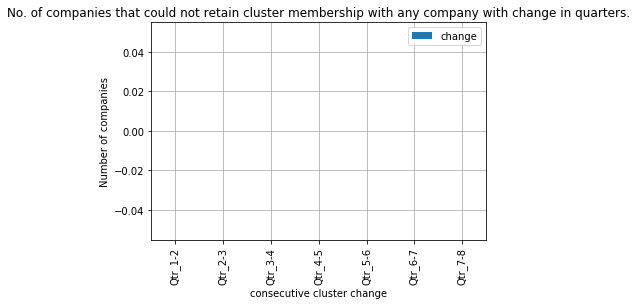

In [7]:
#create label dataframe for cluster 3 results"
label_df_cl3=pd.DataFrame()
current_dir=os.getcwd()
path=os.path.join(current_dir, 'Results_without_sentiment/cluster_df_cl3')

df=pd.read_csv(path+"/1_qt_result.csv")
df=df.drop(columns=['Unnamed: 0'])
label_df_cl3=df[['symbol','sector','label']]
#label_df_cl3.rename(columns = {'label':'label_1'}, inplace = True)
temp=label_df_cl3.copy()
label_df_cl3=create_label_df(temp,path)        

cols=label_df_cl3.columns.difference(['symbol','sector'])
cols

### Total number of unique combinations for cluster movements in the data for all quarters

cluster_comb(label_df_cl3,cols)

###  List of set of companies that were always together in a cluster for all quarters 

senti_label=0
cluster_member(label_df_cl3,cols,3,senti_label)

### No. of companies that could not retain cluster membership with any company with change in quarters.

cols_l=list(cols)
cluster_change(label_df_cl3,8,3,cols_l,senti_label)  




## EDA-K-Medoids with 4 Clusters  (with sentiment)

 
Total number of unique combinations for cluster movements in the data for all quarters=
 9
   label1  label2  label3  label4  label5  label6  label7  label8
0       3       3       1       2     1.0       1     2.0     1.0
1       1       1       3       2     2.0       3     3.0     2.0
2       2       2       0       0     2.0       3     1.0     3.0
3       0       0       0       3     1.0       1     2.0     1.0
4       1       1       1       2     3.0       0     3.0     1.0

List of set of companies that were always together in a cluster for all quarters
        symbol                                         sector
0      APH,AVY               Information Technology,Materials
1      AEP,ETR                            Utilities,Utilities
2      NEE,AMT                          Utilities,Real Estate
3  DISCA,DISCK  Consumer Discretionary,Consumer Discretionary
4      ADS,OXY                  Information Technology,Energy
5   GOOGL,GOOG  Information Technology,Information Techno

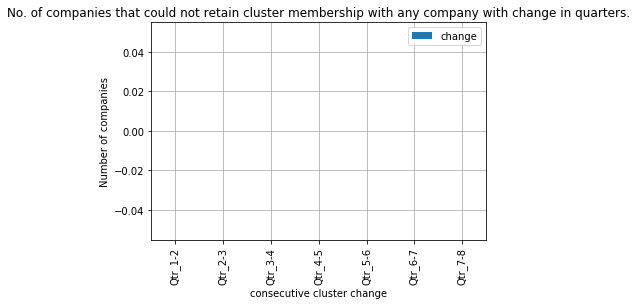

In [8]:

label_df_cl4=pd.DataFrame()
current_dir=os.getcwd()
path=os.path.join(current_dir, 'Results_with_sentiment/cluster_df_cl4')

df=pd.read_csv(path+"/1_qt_result.csv")
df=df.drop(columns=['Unnamed: 0'])
label_df_cl4=df[['symbol','sector','label']]
#label_df_cl4.rename(columns = {'label':'label_1'}, inplace = True)
temp=label_df_cl4.copy()
label_df_cl4=create_label_df(temp,path)        

col=label_df_cl4.columns.difference(['symbol','sector'])


### Total number of unique combinations for cluster movements in the data for all quarters

cluster_comb(label_df_cl4,col)

### List of set of companies that were always together in a cluster for all quarters
senti_label=1
cluster_member(label_df_cl4,col,4,senti_label)

cols=list(col)
cluster_change(label_df_cl4,8,4,cols,senti_label)

## EDA-with 4 Clusters  (without sentiment)

 
Total number of unique combinations for cluster movements in the data for all quarters=
 6
   label1  label2  label3  label4  label5  label6  label7  label8
0       3       3       0       0     1.0       1     0.0     0.0
1       3       3       3       0     2.0       2     2.0     2.0
2       1       1       0       3     2.0       2     0.0     3.0
3       3       3       2       0     3.0       1     2.0     0.0
4       2       2       3       1     0.0       1     1.0     3.0

List of set of companies that were always together in a cluster for all quarters
        symbol                                         sector
0   GOOGL,GOOG  Information Technology,Information Technology
1      AWK,CMS                            Utilities,Utilities
2  LNT,AEP,ETR                  Utilities,Utilities,Utilities
3     ACN,ANSS  Information Technology,Information Technology
4  DISCA,DISCK  Consumer Discretionary,Consumer Discretionary
5      ADS,OXY                  Information Technology,En

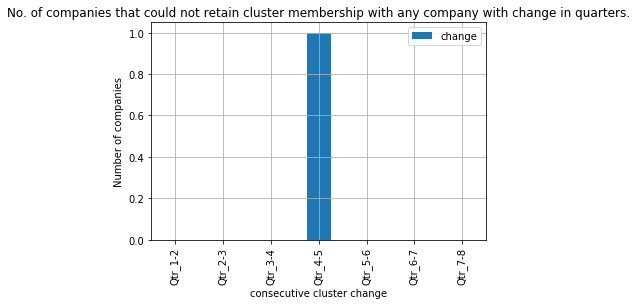

In [9]:

label_df_cl4=pd.DataFrame()
current_dir=os.getcwd()
path=os.path.join(current_dir, 'Results_without_sentiment/cluster_df_cl4')

df=pd.read_csv(path+"/1_qt_result.csv")
df=df.drop(columns=['Unnamed: 0'])
label_df_cl4=df[['symbol','sector','label']]
#label_df_cl4.rename(columns = {'label':'label_1'}, inplace = True)
temp=label_df_cl4.copy()
label_df_cl4=create_label_df(temp,path)        

cols=label_df_cl4.columns.difference(['symbol','sector'])


### Total number of unique combinations for cluster movements in the data for all quarters

cluster_comb(label_df_cl4,cols)

### List of set of companies that were always together in a cluster for all quarters
senti_label=0
cluster_member(label_df_cl4,cols,4,senti_label)

cols_l=list(col)
cluster_change(label_df_cl4,8,4,cols_l,senti_label)